In [ ]:

!pip install opencv-contrib-python matplotlib

Saving Img1.jpg to Img1 (1).jpg
Saving Img2.jpg to Img2 (1).jpg


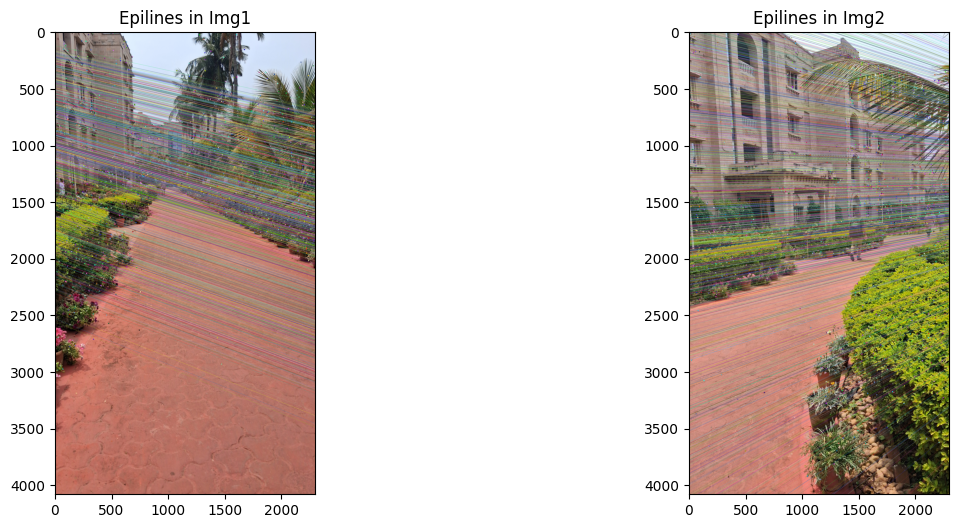

In [ ]:

from google.colab import files
uploaded = files.upload()

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load two images
img1 = cv2.imread('Img1.jpg')
img2 = cv2.imread('Img2.jpg')
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)


FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)


good = []
pts1 = []
pts2 = []
for m, n in matches:
    if m.distance < 0.8 * n.distance:
        good.append(m)
        pts1.append(kp1[m.queryIdx].pt)
        pts2.append(kp2[m.trainIdx].pt)

pts1 = np.int32(pts1)
pts2 = np.int32(pts2)


F, mask = cv2.findFundamentalMat(pts1, pts2, cv2.FM_LMEDS)


pts1 = pts1[mask.ravel() == 1]
pts2 = pts2[mask.ravel() == 1]


def drawlines(img1, img2, lines, pts1, pts2):
    ''' Draw epilines for points in img1 on img2 '''
    r, c = img1.shape[:2]
    img1_color = img1.copy()
    img2_color = img2.copy()
    for r_line, pt1, pt2 in zip(lines, pts1, pts2):
        color = tuple(np.random.randint(0, 255, 3).tolist())
        x0, y0 = map(int, [0, -r_line[2] / r_line[1]])
        x1, y1 = map(int, [c, -(r_line[2] + r_line[0] * c) / r_line[1]])
        img1_color = cv2.line(img1_color, (x0, y0), (x1, y1), color, 1)
        img1_color = cv2.circle(img1_color, tuple(pt1), 5, color, -1)
        img2_color = cv2.circle(img2_color, tuple(pt2), 5, color, -1)
    return img1_color, img2_color


lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1, 1, 2), 2, F)
lines1 = lines1.reshape(-1, 3)
img5, img6 = drawlines(img1, img2, lines1, pts1, pts2)


lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1, 1, 2), 1, F)
lines2 = lines2.reshape(-1, 3)
img3, img4 = drawlines(img2, img1, lines2, pts2, pts1)


plt.figure(figsize=(15, 6))
plt.subplot(121), plt.imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)), plt.title('Epilines in Img1')
plt.subplot(122), plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)), plt.title('Epilines in Img2')
plt.show()